In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# python私房手册-jupyter,pycharm,conda等工具使用技巧

## jupyter

### 安装和配置


安装不多说，不想折腾直接安装anaconda包，集成了Jupyter和Ipython。主要说说配置：
Ipython的配置文件和Jupyter的配置文件是分开的，在window下cmd下，运行ipython profile create（IPython），和jupyter notebook --generate-config（jupyter）会生成默认的配置文件。 

默认的配置文件路径如下：
```
Ipython：  
c:\Users\Administrator\\.ipython\profile_default\ipython_config.py  
Jupyter：  
c:\Users\Administrator\\.jupyter\jupyter_notebook_config.py
```
c:\User\Administrator是系统环境变量$USERPROFILE，个人配置不同，在dos下可输入set命令查看。  
里面的配置选项都是被#注释掉的，想要配置哪一项，去掉#号进行配置即可。  

这里记录几个之前遇到的坑：  

1. 《用pandas进行数据分析》里面提到过的Ipython的line_profiler插件，在IPython7.2版本下，配置选项是c.InteractiveShellApp.extensions = ['line_profiler']，而不是书上的c.TerminalIPythonApp.extensions = ['line_profiler']。

2. Jupyter和Ipython都可以自定义配置文件，IPython在上面提到的cmd命令后加上项目名称，可以生成该项目对应的配置文件，如：ipython profile create secret_project，Jupyter只要将默认的配置文件改成想要的名字就可以了，假设改成my_custom_config.py。
   想要使用自定义的配置文件，需要在启动的时候特别指明。假设你创建了一个secret_project的配置文件，Ipython的启动命令是这样：
   ```shell
   ipython --profile=secret_project
   ```
   Jupyter的启动命令是这样：

   ```shell
   jupyter notebook --config=c:/Users/Administrator/.jupyter/my_custom_config.py
   ```
   需要指定配置文件的路径。
   （如果是anaconda安装的，如何使用自定义的配置没有尝试过，尚不清楚）

3. Jupyter可以在默认的文件路径下配置一个jupyter_notebook_config.json文件，其级别比默认的py文件要高，如果有冲突的话，优先会读取json文件的配置。这个问题在配置Jupyter的nb extensions插件时可能会碰到：该插件会让你配置这个json文件，其实只要在默认的py文件中配置就可以了，修改`c.NotebookApp.nbserver_extensions = {"jupyter_nbextensions_configurator": True}`这一行即可，不需要再新建json文件。

4. 安装以后Jupyter默认打开的文件目录可能不是你想要的，如果用anaconda安装的，windows下直接修改Jupyter的快捷方式，右键点击->属性->起始位置改成你想要的就可以了。

### 使用技巧

这里按照《用Pandas进行数据分析》第二版附录B的结构对使用技巧和魔术方法统一总结，大部分内容也是书上的内容，所以不再举具体的例子，仅作一个梳理和记录。没有特别说明，则是IPython和Jupyter通用的功能。  
书的链接是：[用Pandas进行数据分析](https://www.jianshu.com/p/04d180d90a3f)

#### 魔术方法一览

使用%lsmagic可以查看所有的魔术命令：
```python
Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%ruby  %%script  %%sh  %%svg  %%sx  %%system  %%time  %%timeit  %%writefile
```
其中一个百分号称为line magic（行魔术命令），只能作用于一行代码，两个百分号成为（块魔术命令）作用于一个cell代码块。

`%pinfo object`或者`object?`会打印该对象的相关信息。`%pinfo2 object`或者`object??`除了相关信息外，还会显示对象的源码。

`%%capture`可以方便的捕获stdout/stderr的输出，或者保存在变量留待后用：
   ```python
   In  [5] :  %%capture capt
              import sys
              print('Hello stdout')
              print('and stderr', file=sys.stderr)
               
   In  [6] :  capt.stdout, capt.stderr
   Out [6] :  ('Hello stdout\n', 'and stderr\n')
   
   In  [7] :  capt.show()
   Out [7] :  Hello stdout
              and stderr 
   ```

`%%writefile`可以非常方便的将代码块内容写入一个文件（或者%%file）：
   ```python
   In  [8] :  %%writefile foo.py
              print('Hello world')
   Out [8] :  Writing foo.py
   
   In  [9] :  %run foo
   Out [9] :  Hello world   
   ```

dreload函数，注意这个不是魔术函数，类似与importlib库的reload函数，但是可以重载深层的模块。

`%load`魔术方法可以 将脚本导入到一个单元格中。

`%paste`和`%cpaste`可以直接运行剪贴板中的代码，不同的是，`%cpaste`会给出一个提示(只有IPython有)。

#### 使用历史命令

1. Ctrl+P（或者上箭头）、Ctrl+N（或者下箭头）可以快速浏览历史命令，Ctrl+R可以搜索历史命令（只对IPython有效）。
2. \_和\_\_分别代表前面2行的输出，输入变量是存储在名字类似_iX的变量中，X是输入行的编号。输入全部被保存为字符串的形式，因此可以直接使用exec命令再次执行。
3. `%hist`可以打印所有或部分的输入历史（加上编号指定打印的部分）。`%reset`清理交互命名空间，或输入和输出缓存。`%xdel`魔术函数可以去除IPython中对一个特别对象的所有引用。因为IPython会记录输入和输出的历史，因此会造成被引用的对象不被垃圾回收（释放内存），即使使用del关键字从交互命名空间删除变量也没用。在这种情况下，小心使用`%xdel` 和`%reset`可以避免陷入内存问题。

#### 与操作系统交互

基本的命令如下：
![title](command.png)
有几个需要注意的地方或者一些技巧：
1. 使用！执行shell命令的时候，可以用一个变量保存命令执行的输出。如 ：`a = !dir`
2. 同样，也可以通过\$符号调用python的变量。如：
```
a = 'dir'
!$a
```
3. `%alias`创建的别名是session有效的，如果要创建永久的别名，需要使用配置文件。
4. `%bookmark`创建的书签是永久有效的，可以用`%bookmark -l`查看所有书签，如果书签的名字，与当前工作目录的一个目录重名，可以使用`-b`标志来覆写，使用书签的位置。

#### 交互调试器

基本命令如下：
![title](command2.png)
举例说明：   
`l 20`：显示当前行上下共20行代码  
`l 1, 30`：显示从1到第30行代码  
`break`：查看断点信息  
`condition 1 [条件]`：给断点1设定条件, 这里pression是python表达式，当条件满足时在该点停下来  
`disable 1`：禁用断点1  
`enable 1`：恢复断点1  
`clear 1`：删除断点1   
`ignore 1 3`：在执行到断点1第四次时才启用该断点  
`commands 1`：给断点1设定触发动作，每次运行到该断点时，执行设定的python表达式，比如用于观察某一变量的变化情况，输入end结束commands。 

一些需要注意的地方以及一些小技巧：
- 异常之后马上输入`%debug`可以直接启动调试器，进入抛出异常的堆栈框架。
- `%pdb`开关可以设置是否在代码抛出异常时，自动进入调试器。
- 如果想在运行脚本的时候直接进入调试器，可以使用`%run -d`来执行脚本。
- 调试器中，在变量之前加！，可以查看变量的值。

《用Pandas进行数据分析》书中还提供了两个函数非常实用，这里略微进行了修改：
```python
from IPython.core.debugger import Pdb

def set_trace():
    Pdb().set_trace(sys._getframe().f_back)

def debug(f, *args, **kwargs):
    return Pdb().runcall(f, *args, **kwargs)
```
`set_trace`也可以直接`from IPython.core.debugger import set_trace`，貌似没有差别。

其中：`set_trace()`可以放在代码的任何位置，运行到这里的时候就会暂停，可以说是一个手动的断点。而`debug`函数接受一个函数作为第一个参数，`*args`和`*kwargs`是传递给f函数的位置和关键字参数，执行debug可以直接启动调试器并进入f函数。
把上述的代码添加到IPython配置文件的`c.InteractiveShellApp.code_to_run`选项中，就可以在IPython启动的时候自动执行。目前没有发现jupyter的配置文件哪里可以设置在启动的时候执行脚本的。

#### 代码计时和基础分析

1. `%time`和`%timeit`都用来记录一行代码耗时，它们的区别在于`%time`只运行一次，而`%timeit`运行多次。`%%time`和`%%timeit`可以记录一段代码的耗时。
2. `%prun`和`%run -p`是一样的，调用cprofile内置模块对代码进行分析。如`%prun -l 7 -s cumulative example.py`，其中-l是显示前7个条目，-s cumulative意思是按照cumulative来排序。同样，可以用%%来运行一段代码。    
cprofile使用的不多，这里链接一篇文章可以参考[《使用cProfile+pstats+gprof2dot分析python代码性能》](https://www.jianshu.com/p/7b56d64545f4)
3. cprofile不能获得函数内部的执行过程，其结果比较复杂，难以进行解读，可以安装line_profiler对函数进行逐行分析。line_profiler包含IPython插件，安装库以后，在IPython的配置文件中进行配置`c.InteractiveShellApp.extensions = ['line_profiler']`，也可以使用魔术命令`%load_ext line_profiler`在会话中读入模块。语法是：
```   
%lprun -f func1 -f func2 statement_to_profile
```

#### 富文本输出

在jupyter中，可以方便的显示以下的类型：
- HTML
- JSON
- PNG
- JPEG
- SVG
- LaTeX

首先导入display函数（jupyter不需要下面列举的各种display函数就可以直接显示）：
```
from IPython.display import display
```
也可以指定特定的显示函数：

```python
from IPython.display import (
    display_pretty, display_html, display_jpeg,
    display_png, display_json, display_latex, display_svg
)
```
以及不同类型对应的包装对象，如image格式的包装对象：

```Python
from IPython.display import Image
i = Image(filename='logo.png')
```
直接输入`i`或者`display(i)`就可以输出了。
默认图像是嵌入notebook文档，这样在离线的时候仍然可以显示图片，但缺点是图片不是动态变更的，也可以存储一个链接，这样图片可以动态更新，如下：

```python
from IPython.display import Image
img_url = 'http://www.lawrencehallofscience.org/static/scienceview/scienceview.berkeley.edu/html/view/view_assets/images/newview.jpg'

# by default Image data are embedded
Embed = Image(img_url)

# if kwarg `url` is given, the embedding is assumed to be false
SoftLinked = Image(url=img_url)

# In each case, embed can be specified explicitly with the `embed` kwarg
# ForceEmbed = Image(url=img_url, embed=True)
```
另外，也有一些魔术命令简化以上的步骤，例如：`%%html`, `%%javascript`，`%%bash`， `%%script`等等。
最后值得一提的是FileLink和Filelinks，可以方便的将本地文件链接到notebook的文档中：
```python
from IPython.display import FileLink
FileLink('README.md') 
```
FileLink可以显示单个文件，FileLinks可以显示文件夹下所有文件。  
参考文档[《Jupyter的富文本输出》](https://nbviewer.jupyter.org/github/ipython/ipython/blob/6.x/examples/IPython%20Kernel/Rich%20Output.ipynb)

#### 如何关闭warning输出

可以这样设置
```Python
import warnings
warnings.filterwarnings('ignore')
```
关闭的时候可以这样
```Python
warnings.filterwarnings('default')
```

### 常用的快捷键

Jupyter有自己的一套快捷键，可以在help->快捷键中方便的查看。这里记录一些平时比较容易忽略的：  
- `Ctrl + "/"`：批量注释

## pycharm

- [《你有哪些想要分享的 PyCharm 使用技巧？》](https://www.zhihu.com/question/37787004)
- [《PyCharm使用技巧》](https://www.evget.com/serializedetail/514)

### 常用快捷键

- Shift + Enter：不破坏结构的情况下另起一行。
- Ctrl + W 和 Shift + W：扩大/缩小选取，意思是根据内容选取代码，比如选择方法，再按选择类，再按选择整行。
- Ctrl + Shift + A：搜索整个IDE，比如想看看这个文件的历史，就键入 history 可以找到 Local history。
- Ctrl + J：快速选择模板，在 Setting->Editor->File and Codes Templates，可以看到所有的模板，可以自定义。
- Ctrl + F6：修改函数签名。
- Shift + F6：修改参数名称，与修改函数签名比较，修改签名更全面。

### 设置文档的风格

在`File->Settings->Tools->Python Integrated Tools->Docstrings`里可以选择文档的风格，默认是`reStructuredText`，使用比较多的是`Numpy`风格。
- [《飘逸的python - 代码即文档docstring》](https://blog.csdn.net/handsomekang/article/details/46830083)。

### 使用书签

[pycharm书签的使用](https://www.cnblogs.com/gl1573/p/10234478.html)
- Ctrl + F11：设置书签
- Shift + F11：展示书签
- F11：删除书签

另外，按了 Ctrl+F11 以后，可以输入数字或者字母，作为快捷键，下一次按 Ctrl+字母/数字 可以快速跳转。

### 代码重构

- [《代码重构》](https://www.evget.com/article/2018/8/13/28321.html)

PyCharm代码重构功能非常强大，代码重构那篇文章描述比较详细。这里有几点要说明：
1. Inline variable重构，内联变量重构，指消除变量，将原来使用变量的地方直接用表达式代替。

### 调试

#### 设置自动在异常处中断

先选择run->view breakpoints，如下：
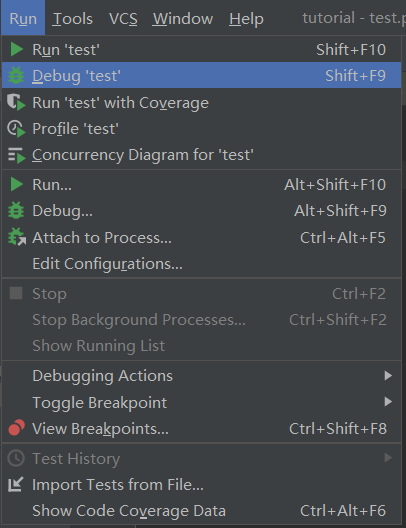

然后给`python Exception Breakpoint`选项打勾，如下：
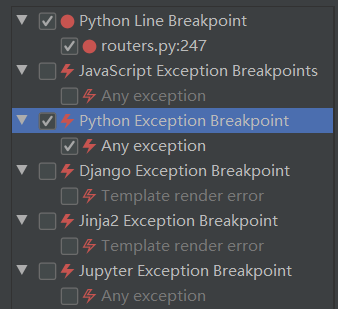

则再次运行debug进行调试的时候，会自动在出现异常的地方中断。

## conda

- [conda的简单使用](http://lizhiqiang.me/conda/)

### python文档中的:==是啥？

这是专门用来描述计算机编程语法的一种通用的格式，具体的说明查看下面链接，简单来说就是左边的表达式可以用右边的来代替。

[维基百科Backus–Naur样式(要翻墙)](https://en.wikipedia.org/wiki/Backus%E2%80%93Naur_form)